# Mod 3 Final Project

## Student Info

- Name: Jamaal Smith
- Cohort: Part-Time 
- Instructor: James Irving, Phd


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mod-3-project-online-ds-ft-100719/master/Northwind_ERD_updated.png">

In [231]:
!pip install -U fsds_100719
from fsds_100719.imports import *

import pandas as pd


Requirement already up-to-date: fsds_100719 in c:\anaconda\envs\learn-env\lib\site-packages (0.7.13)
Requirement not upgraded as not directly required: pandas in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (0.23.4)
Requirement not upgraded as not directly required: pprint in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (0.1)
Requirement not upgraded as not directly required: cufflinks in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (0.17.0)
Requirement not upgraded as not directly required: IPython in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (6.5.0)
Requirement not upgraded as not directly required: pyperclip in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (1.7.0)
Requirement not upgraded as not directly required: missingno in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (0.4.2)
Requirement not upgraded as not directly required: ipywidgets in c:\anaconda\envs\learn-env

pexpect 4.6.0 requires ptyprocess>=0.5, which is not installed.
phik 0.9.9 has requirement joblib>=0.14.1, but you'll have joblib 0.14.0 which is incompatible.
astroid 2.3.3 has requirement six~=1.12, but you'll have six 1.11.0 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# PROJECT

# Hypothesis 1

> Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

- $H_0$: A product's discount has no effect on the quantity of a product in an order
- $H_A$: A product's discount does have an effect on the quantity of a product in an order

In [232]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT * FROM OrderDetail""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [233]:
df['Groups'] = df['Discount']>0
df['Groups'] = df['Groups'].map({True:'Discounted',False:'Full Price'})
df['Groups_Number'] = df['Groups'].map({'Discounted': 1, 'Full Price': 0})
df.head(10)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Groups,Groups_Number
0,10248/11,10248,11,14.0,12,0.00,Full Price,0
1,10248/42,10248,42,9.8,10,0.00,Full Price,0
2,10248/72,10248,72,34.8,5,0.00,Full Price,0
3,10249/14,10249,14,18.6,9,0.00,Full Price,0
4,10249/51,10249,51,42.4,40,0.00,Full Price,0
5,10250/41,10250,41,7.7,10,0.00,Full Price,0
6,10250/51,10250,51,42.4,35,0.15,Discounted,1
7,10250/65,10250,65,16.8,15,0.15,Discounted,1
8,10251/22,10251,22,16.8,6,0.05,Discounted,1
9,10251/57,10251,57,15.6,15,0.05,Discounted,1


- The data is numerical and we are comparing two groups. Thus, we must employ a 2-sample T-test. TO complete this test, we must make sure that the data meets the following assumptions: no significant outliers, normality and equal variance

## Test for outliers

In [234]:
## To better organize data based on whether an item was full-priced or not, we can create dictionaries
groups = {}
for grp_name in df['Groups'].unique():
    groups[grp_name] = df.groupby('Groups').get_group(grp_name)['Quantity']
groups

{'Full Price': 0        12
 1        10
 2         5
 3         9
 4        40
 5        10
 10       20
 13       40
 14       20
 15       42
 16       40
 19       21
 20       20
 21       35
 22       25
 23       30
 24       15
 25       12
 26       25
 27        6
 28       15
 32       10
 33        1
 35       50
 38       20
 39       20
 41       15
 42        2
 44       28
 47       35
        ... 
 2088      4
 2089     10
 2090     15
 2093     30
 2097     12
 2100     55
 2103      3
 2104     42
 2105     35
 2106      9
 2110     20
 2114     20
 2117      8
 2118     40
 2119     22
 2120    130
 2121     10
 2122     20
 2131      4
 2132      1
 2136      1
 2138      4
 2142      2
 2143      1
 2145      3
 2147      2
 2148      2
 2151      1
 2153      4
 2154      2
 Name: Quantity, Length: 1317, dtype: int64, 'Discounted': 6       35
 7       15
 8        6
 9       15
 11      40
 12      25
 17      15
 18      21
 29      50
 30      65
 31       6
 34

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Quantities Ordered by Price Type')]

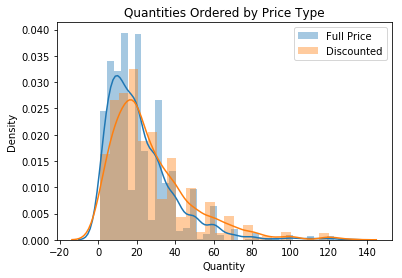

In [235]:
#Visualize the data to get sense of present outlier

for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Quantities Ordered by Price Type',ylabel='Density')

In [236]:
from functions import Cohen_d,find_outliers_IQR,find_outliers_Z

In [237]:
#Identifying Outliers

for k,v in groups.items():
    idx_out = find_outliers_Z(v)
    print(f'There are {idx_out} outliers present in {grp_name} using Z-Score')
    groups[k] = v[~idx_out]
    

There are 0       False
1       False
2       False
3       False
4       False
5       False
10      False
13      False
14      False
15      False
16      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
32      False
33      False
35      False
38      False
39      False
41      False
42      False
44      False
47      False
        ...  
2088    False
2089    False
2090    False
2093    False
2097    False
2100    False
2103    False
2104    False
2105    False
2106    False
2110    False
2114    False
2117    False
2118    False
2119    False
2120     True
2121    False
2122    False
2131    False
2132    False
2136    False
2138    False
2142    False
2143    False
2145    False
2147    False
2148    False
2151    False
2153    False
2154    False
Length: 1317, dtype: bool outliers present in Discounted using Z-Score
There are 6       False
7       False
8       False
9       False

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Quantities Ordered by Price Type')]

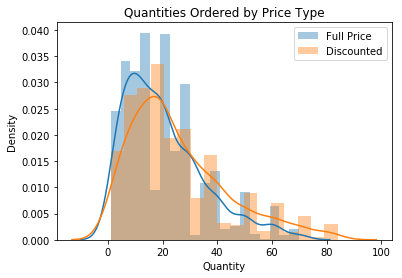

In [238]:
#Replotting of density plot without outliers

for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Quantities Ordered by Price Type',ylabel='Density')



## Testing for Normality

In [239]:
import scipy.stats as stats    

In [240]:
#Normalcy test with scipy library
for k,v in groups.items():
    stat,p = stats.normaltest(v)
    print(f' Group {k} Normaltest p-value = {round(p,4)}')
    sig = 'is Not' if p<0.5 else 'is'
    print(f' -The data is {sig} normal')

 Group Full Price Normaltest p-value = 0.0
 -The data is is Not normal
 Group Discounted Normaltest p-value = 0.0
 -The data is is Not normal


In [241]:
#large data sets are ok to be used as long as data set is large
len(groups['Full Price']), len(groups['Discounted'])

(1297, 823)

## Equal Variance

In [242]:
data = []
for k, v in groups.items():
    data.append(v)

stat,p = stats.levene(*data)

print (f'Levene Test for Equal Variance p-value = {round(p,4)}')
sig = 'is Not' if p<0.5 else 'is'
print(f' -The data {sig} equally varied')

Levene Test for Equal Variance p-value = 0.0
 -The data is Not equally varied


- Due to the data not having equal variance, we must use the Welch's test

In [243]:
stat,p = stats.ttest_ind(*data, equal_var=False)
print(f" Welch's t-test p-value is {round(p,4)}")

 Welch's t-test p-value is 0.0


## Effect Size / Tukey

In [244]:
Cohen_d(*data)

-0.32001140965727837

In [245]:
def prep_data_for_tukeys(data):
    """Accepts a dictionary with group names as the keys 
    and pandas series as the values. 
    
    Returns a dataframe ready for tukeys test:
    - with a 'data' column and a 'group' column for sms.stats.multicomp.pairwise_tukeyhsd 
    
    Example Use:
    df_tukey = prep_data_for_tukeys(grp_data)
    tukey = sms.stats.multicomp.pairwise_tukeyhsd(df_tukey['data'], df_tukey['group'])
    tukey.summary()
    """
    import pandas as pd
    df_tukey = pd.DataFrame(columns=['data','group'])

    for k,v in  data.items():
        grp_df = v.rename('data').to_frame()
        
        
        grp_df['group'] = k
        df_tukey=pd.concat([df_tukey,grp_df],axis=0)
        
    df_tukey['data'] = df_tukey['data'].astype(float)
    df_tukey['group'] = df_tukey['group'].astype(str)
    return df_tukey

In [246]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = pairwise_tukeyhsd(df_tukey['data'],df_tukey['group'])
model.summary()

group1,group2,meandiff,lower,upper,reject
British Isles,Central America,-28.4823,-84.6475,27.6829,False
British Isles,Eastern Europe,-36.8814,-135.5423,61.7795,False
British Isles,North America,22.6807,-13.022,58.3834,False
British Isles,Northern Europe,22.2636,-22.2582,66.7854,False
British Isles,Scandinavia,-19.6161,-75.0442,35.8121,False
British Isles,South America,-11.1318,-46.9577,24.6942,False
British Isles,Southern Europe,-29.8533,-72.9178,13.2113,False
British Isles,Western Europe,18.131,-14.7499,51.0119,False
Central America,Eastern Europe,-8.3991,-114.1585,97.3603,False
Central America,North America,51.163,-1.0459,103.3719,False


C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

No handles with labels found to put in legend.


[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Quantities Ordered by Discount Bin')]

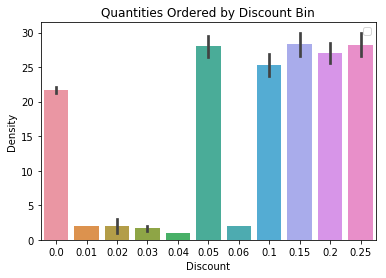

In [247]:
sns.barplot(data=df, x='Discount', y='Quantity',ci=68)
ax = plt.gca()
ax.legend()
ax.set(title = 'Quantities Ordered by Discount Bin',ylabel='Density')




## Conclusion

With a p-value resulting from the Welch test < 0.01, which is below the alpha value of 0.05, the null hypothesis can be rejected and it can be affirmed: a product's discount does affect the quantity ordered.

# Hypothesis 2

> Do customers in different regions have different demands related to shipment time?

- $H_0$: A shipment's final destination has no impact on a customer's shipment time requirements.
- $H_A$: A shipment's final destination has an impact on a customer's shipment time requirements.

In [248]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT OrderDate,RequiredDate,ShippedDate,ShipRegion FROM 'Order';""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,OrderDate,RequiredDate,ShippedDate,ShipRegion
0,2012-07-04,2012-08-01,2012-07-16,Western Europe
1,2012-07-05,2012-08-16,2012-07-10,Western Europe
2,2012-07-08,2012-08-05,2012-07-12,South America
3,2012-07-08,2012-08-05,2012-07-15,Western Europe
4,2012-07-09,2012-08-06,2012-07-11,Western Europe


In [249]:
import datetime as dt

#do certain regions have more urgent shipment requirments or use the shippeddate
#utilize requireddate 

df['ShippedDate'] = pd.to_datetime(df['ShippedDate']) #create column for time needed for item be delivered from order date
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['RequiredDate'] = pd.to_datetime(df['RequiredDate'])

df['Time2Delivery'] = abs(df['RequiredDate'] - df['OrderDate']) #number of days an item takes to ship

df.head()

,OrderDate,RequiredDate,ShippedDate,ShipRegion,Time2Delivery
0,2012-07-04,2012-08-01,2012-07-16,Western Europe,28 days
1,2012-07-05,2012-08-16,2012-07-10,Western Europe,42 days
2,2012-07-08,2012-08-05,2012-07-12,South America,28 days
3,2012-07-08,2012-08-05,2012-07-15,Western Europe,28 days
4,2012-07-09,2012-08-06,2012-07-11,Western Europe,28 days


In [250]:
df['Days'] = (df['Time2Delivery'] / np.timedelta64(1, 'D')).astype(float) #stack overflow is a god send 
display(df['Days'].head())
df['Days'].describe()
df['ShipRegion'].value_counts()

0    28.0
1    42.0
2    28.0
3    28.0
4    28.0
Name: Days, dtype: float64

Western Europe     276
North America      152
South America      145
British Isles       75
Southern Europe     64
Northern Europe     55
Scandinavia         28
Central America     28
Eastern Europe       7
Name: ShipRegion, dtype: int64

In [251]:
df['ShipRegion'].describe()
df['ShipRegion'] = df['ShipRegion'].convert_objects(convert_numeric=True)

C:\anaconda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In theory, if there is no difference in delivery time from when an order is placed until it is shipped, there should be no difference based on geographical region. For simplicity sake, I grouped all ShipRegions that are in Europe and the Americas as one item and all other regions as Other Market. Again, for the null hypothesis to be true, there should be no difference in both means.


In [252]:
#breaking up the groups based on region and will just use
#with rework, look at this again
df['Groups'] = df['ShipRegion'].str.contains('Europe'or'America')
#mapping function to label true as correct country in graphs below and same for the false group

#df['Groups'] = df['Groups'].astype(int) # used Boolean to prevent error with later tests that require two numbered columns
df['Groups'].head()

0     True
1     True
2    False
3     True
4     True
Name: Groups, dtype: bool

The True ship regions contain Europe or America in their names. So that tests can be run on them later, I will convert the Boolean output to an integer so these regions are represented as 1 and all others as 0 for simplicity.

## Test for Outliers

In [253]:
## To better organize data based on whether an item was full-priced or not, we can create dictionaries
groups = {}
for grp_name in df['ShipRegion'].unique():
    groups[grp_name] = df.groupby('ShipRegion').get_group(grp_name)['Days']
groups.pop('Eastern Europe')

126    28.0
363    28.0
544    28.0
622    28.0
658    14.0
750    14.0
796    28.0
Name: Days, dtype: float64

[Text(0, 0, 'Western Europe'),
 Text(0, 0, 'South America'),
 Text(0, 0, 'Central America'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Northern Europe'),
 Text(0, 0, 'Scandinavia'),
 Text(0, 0, 'Southern Europe'),
 Text(0, 0, 'British Isles'),
 Text(0, 0, 'Eastern Europe')]

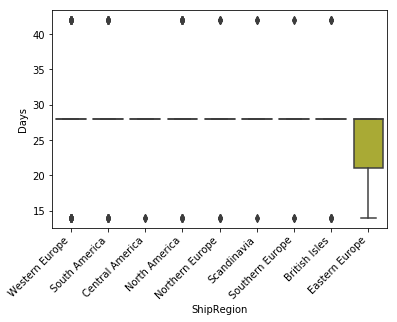

In [254]:
sns.boxplot(data = df, x='ShipRegion',y='Days')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,ha = 'right')

In [255]:
#for k,v in groups.items():
 #   sns.b(v,label = k)
#ax = plt.gca()
#ax.legend()
#ax.set(title = 'Days Required to Ship to Region',ylabel='Density')

In [256]:
for k,v in groups.items():
    idx_out = find_outliers_Z(v)
    print(f'There are {idx_out} outliers present in {grp_name} using Z-Score')
    groups[k] = v[~idx_out]

There are 0      False
1      False
3      False
4      False
6      False
7      False
10     False
12     False
15     False
17     False
19     False
25     False
26     False
29     False
31     False
36     False
37     False
38     False
47     False
49     False
53     False
54     False
63     False
64     False
65     False
75     False
77     False
83     False
86     False
89     False
       ...  
730    False
731    False
742    False
743    False
748    False
751    False
756    False
760    False
763    False
764    False
769    False
772    False
773    False
780    False
781    False
785    False
787    False
788    False
790    False
793    False
795    False
798    False
803    False
805    False
810    False
819    False
822    False
824    False
827    False
828    False
Length: 276, dtype: bool outliers present in Eastern Europe using Z-Score
There are 2      False
5      False
8      False
9      False
13     False
20     False
35     False
39     False
42     Fa

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\anaconda\envs\learn-env\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\anaconda\envs\learn-env\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Shipment Tme by Region')]

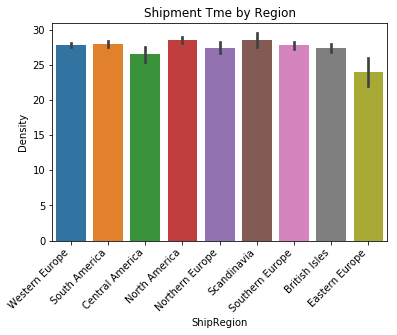

In [257]:
for k,v in groups.items():
    sns.distplot(v,label = k)
sns.barplot(data=df, x='ShipRegion', y='Days',ci=68)
ax = plt.gca()
#ax.legend()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,ha = 'right')
ax.set(title = 'Shipment Tme by Region',ylabel='Density')


## Test for Normalcy

In [258]:
import scipy.stats as stats  

In [259]:
#Normalcy test with scipy library
for k,v in groups.items():
    stat,p = stats.normaltest(v)
    print(f' Group {k} Normaltest p-value = {round(p,4)}')
    sig = 'is Not' if p<0.5 else 'is'
    print(f' -The data {sig} normal')

 Group Western Europe Normaltest p-value = 0.0
 -The data is Not normal
 Group South America Normaltest p-value = 0.0008
 -The data is Not normal
 Group Central America Normaltest p-value = 0.0
 -The data is Not normal
 Group North America Normaltest p-value = 0.0
 -The data is Not normal
 Group Northern Europe Normaltest p-value = 0.0192
 -The data is Not normal
 Group Scandinavia Normaltest p-value = 0.0383
 -The data is Not normal
 Group Southern Europe Normaltest p-value = 0.5883
 -The data is normal
 Group British Isles Normaltest p-value = 0.0054
 -The data is Not normal


## Equal Variance

In [260]:
data = []
for k, v in groups.items():
    data.append(v)

stat,p = stats.levene(*data)

print (f'Levene Test for Equal Variance p-value = {round(p,4)}')
sig = 'is Not' if p<0.5 else 'is'
print(f' -The data {sig} equally varied')

Levene Test for Equal Variance p-value = 0.0751
 -The data is Not equally varied


## ANOVA Test

In [261]:
stat,p = stats.f_oneway(*data)
print(f" ANOVA p-value is {round(p,4)}")

 ANOVA p-value is 0.618


## Effect Size / Tukey

In [262]:
#Cohen_d(*data)

In [263]:
def prep_data_for_tukeys(data):
    """Accepts a dictionary with group names as the keys 
    and pandas series as the values. 
    
    Returns a dataframe ready for tukeys test:
    - with a 'data' column and a 'group' column for sms.stats.multicomp.pairwise_tukeyhsd 
    
    Example Use:
    df_tukey = prep_data_for_tukeys(grp_data)
    tukey = sms.stats.multicomp.pairwise_tukeyhsd(df_tukey['data'], df_tukey['group'])
    tukey.summary()
    """
    import pandas as pd
    df_tukey = pd.DataFrame(columns=['data','group'])

    for k,v in  data.items():
        grp_df = v.rename('data').to_frame()
        
        
        grp_df['group'] = k
        df_tukey=pd.concat([df_tukey,grp_df],axis=0)
        
    df_tukey['data'] = df_tukey['data'].astype(float)
    df_tukey['group'] = df_tukey['group'].astype(str)
    return df_tukey

In [264]:
df_tukey = prep_data_for_tukeys(groups) 
df_tukey.head()

,data,group
0,28.0,Western Europe
1,42.0,Western Europe
3,28.0,Western Europe
4,28.0,Western Europe
6,28.0,Western Europe


In [265]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = pairwise_tukeyhsd(df_tukey['data'],df_tukey['group'])
model.summary()

group1,group2,meandiff,lower,upper,reject
British Isles,Central America,-0.94,-4.5843,2.7043,False
British Isles,North America,1.1126,-1.2094,3.4347,False
British Isles,Northern Europe,0.0509,-2.8703,2.9722,False
British Isles,Scandinavia,1.06,-2.5843,4.7043,False
British Isles,South America,0.56,-1.7805,2.9005,False
British Isles,Southern Europe,0.56,-2.3035,3.4235,False
British Isles,Western Europe,0.4078,-1.7349,2.5506,False
Central America,North America,2.0526,-1.3315,5.4367,False
Central America,Northern Europe,0.9909,-2.8293,4.8111,False
Central America,Scandinavia,2.0,-2.3979,6.3979,False


C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

No handles with labels found to put in legend.


[Text(0, 0, 'Western Europe'),
 Text(0, 0, 'South America'),
 Text(0, 0, 'Central America'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Northern Europe'),
 Text(0, 0, 'Scandinavia'),
 Text(0, 0, 'Southern Europe'),
 Text(0, 0, 'British Isles'),
 Text(0, 0, 'Eastern Europe')]

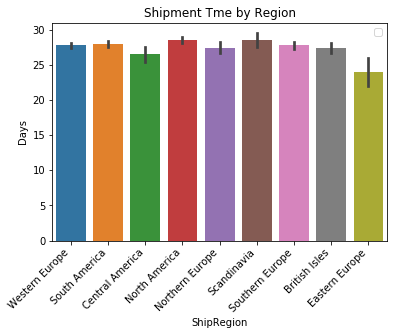

In [266]:
sns.barplot(data=df, x='ShipRegion', y='Days',ci=68)
#for k,v in groups.items():
    #sns.distplot(v,label = k)
#sns.barplot(data=df, x='Groups', y='Days',ci=68)
ax = plt.gca()
ax.legend()
ax.set(title = 'Shipment Tme by Region',ylabel='Days')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,ha = 'right')


## Conclusion

With a p-value score from the ANOVA of 0.618 and alpha value of 0.05, the null hypothesis cannot be rejected in this case. A shipment's final destination doesn't have an impact on the amount it time it takes for it to arrive.

# Hypothesis 3

> Does different employees earn more revenue than other employee?

- $H_0$: All employees earn the same revenue.
- $H_A$: All employees do not earn the same revenue.

In [267]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT * FROM Employee;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [268]:
cur.execute("""SELECT *  FROM OrderDetail;""")
df_orderdetail = pd.DataFrame(cur.fetchall())
df_orderdetail.columns = [x[0] for x in cur.description]
df_orderdetail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [269]:
cur.execute("""SELECT *  FROM 'Order';""")
df_order = pd.DataFrame(cur.fetchall())
df_order.columns = [x[0] for x in cur.description]
df_order.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [270]:
df_order = df_order.merge(df_orderdetail, left_on = 'Id',right_on = 'OrderId')
df_order['Revenue'] = df_order['UnitPrice'] * df_order['Quantity']
df_final = df_order
df_final.head()

,Id_x,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,ShipRegion,ShipPostalCode,ShipCountry,Id_y,OrderId,ProductId,UnitPrice,Quantity,Discount,Revenue
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Western Europe,51100,France,10248/11,10248,11,14.0,12,0.0,168.0
1,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Western Europe,51100,France,10248/42,10248,42,9.8,10,0.0,98.0
2,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Western Europe,51100,France,10248/72,10248,72,34.8,5,0.0,174.0
3,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,Western Europe,44087,Germany,10249/14,10249,14,18.6,9,0.0,167.4
4,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,Western Europe,44087,Germany,10249/51,10249,51,42.4,40,0.0,1696.0


## Test for Outliers

In [271]:
## To better organize data based on whether an item was full-priced or not, we can create dictionaries
groups = {}
for grp_name in df_final['EmployeeId'].unique():
    groups[grp_name] = df_final.groupby('EmployeeId').get_group(grp_name)['Revenue']

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0.5, 1.0, 'Revenue by Employee')]

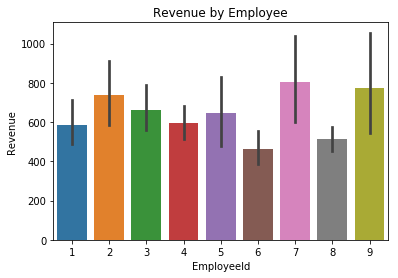

In [272]:
sns.barplot(data = df_final, x='EmployeeId',y='Revenue')
ax = plt.gca()
ax.set(title = 'Revenue by Employee')

In [273]:
for k,v in groups.items():
    idx_out = find_outliers_Z(v)
    print(f'There are {idx_out} outliers present in {grp_name} using Z-Score')
    groups[k] = v[~idx_out]

There are 0       False
1       False
2       False
17      False
18      False
19      False
57      False
58      False
132     False
133     False
190     False
226     False
227     False
228     False
292     False
293     False
294     False
295     False
296     False
297     False
330     False
331      True
332     False
333     False
343     False
397     False
398     False
571     False
572     False
600     False
        ...  
1551    False
1552    False
1553    False
1554    False
1582    False
1583    False
1584    False
1585    False
1622    False
1623    False
1624    False
1629    False
1630    False
1631    False
1632    False
1633    False
1634    False
1638    False
1639    False
1640    False
1641    False
1644    False
1701    False
1748    False
1749    False
1829    False
1830    False
1831    False
1832    False
2053    False
Length: 117, dtype: bool outliers present in 7 using Z-Score
There are 3       False
4       False
47      False
48      False
61      F

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Revenue by Employee')]

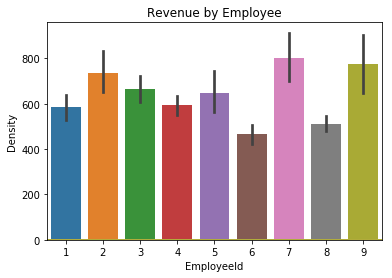

In [274]:
for k,v in groups.items():
    sns.distplot(v,label = k)
sns.barplot(data=df_final, x='EmployeeId', y='Revenue',ci=68)
ax = plt.gca()
#ax.legend()
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,ha = 'right')
ax.set(title = 'Revenue by Employee',ylabel='Density')


## Test for Normalcy

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

No handles with labels found to put in legend.


[Text(0, 0.5, 'Revenue'), Text(0.5, 1.0, 'Employee Earnings')]

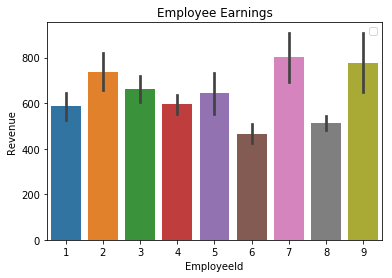

In [275]:
sns.barplot(data= df_final,x='EmployeeId', y='Revenue',ci=68)
ax = plt.gca()
ax.legend()
ax.set(title = 'Employee Earnings',ylabel='Revenue')

In [276]:
#Normalcy test with scipy library
v = df_final['Revenue']
stat,p = stats.normaltest(v)
print(f' Group {k} Normaltest p-value = {round(p,4)}')
sig = 'is Not' if p<0.5 else 'is'
print(f' -The data {sig} normal')

 Group 7 Normaltest p-value = 0.0
 -The data is Not normal


## Equal Variance

In [277]:
data = []
for k, v in groups.items():
    data.append(v)

stat,p = stats.levene(*data)

print (f'Levene Test for Equal Variance p-value = {round(p,4)}')
sig = 'is Not' if p<0.5 else 'is'
print(f' -The data {sig} equally varied')

Levene Test for Equal Variance p-value = 0.0085
 -The data is Not equally varied


## ANOVA Test

In [278]:
stat,p = stats.f_oneway(*data)
print(f" ANOVA p-value is {round(p,4)}")

 ANOVA p-value is 0.0133


## Effect Size/Tukey

In [279]:
def prep_data_for_tukeys(data):
    """Accepts a dictionary with group names as the keys 
    and pandas series as the values. 
    
    Returns a dataframe ready for tukeys test:
    - with a 'data' column and a 'group' column for sms.stats.multicomp.pairwise_tukeyhsd 
    
    Example Use:
    df_tukey = prep_data_for_tukeys(grp_data)
    tukey = sms.stats.multicomp.pairwise_tukeyhsd(df_tukey['data'], df_tukey['group'])
    tukey.summary()
    """
    import pandas as pd
    df_tukey = pd.DataFrame(columns=['data','group'])

    for k,v in  data.items():
        grp_df = v.rename('data').to_frame()
        
        
        grp_df['group'] = k
        df_tukey=pd.concat([df_tukey,grp_df],axis=0)
        
    df_tukey['data'] = df_tukey['data'].astype(float)
    df_tukey['group'] = df_tukey['group'].astype(str)
    return df_tukey

In [280]:
df_tukey = prep_data_for_tukeys(groups) 
df_tukey.head()

,data,group
0,168.0,5
1,98.0,5
2,174.0,5
17,54.0,5
18,403.2,5


In [281]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = pairwise_tukeyhsd(df_tukey['data'],df_tukey['group'])
Hyp3_results = pd.DataFrame(data=model._results_table.data[1:], columns=model._results_table.data[0])
display(Hyp3_results)

,group1,group2,meandiff,lower,upper,reject
0,1,2,79.6672,-70.2948,229.6291,False
1,1,3,67.1948,-70.9812,205.3708,False
2,1,4,17.3957,-112.1200,146.9115,False
3,1,5,16.3457,-175.2574,207.9487,False
4,1,6,-96.4394,-264.7351,71.8563,False
5,1,7,88.6279,-77.3255,254.5813,False
6,1,8,-21.8763,-168.3354,124.5828,False
7,1,9,128.3057,-69.3557,325.9672,False
8,2,3,-12.4723,-164.7385,139.7938,False
9,2,4,-62.2714,-206.7246,82.1817,False


In [282]:
Hyp3_results.loc[Hyp3_results['reject'] == True]

,group1,group2,meandiff,lower,upper,reject
32,6,9,224.7452,3.3919,446.0985,True


C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Revenue'), Text(0.5, 0, 'EmployeeId')]

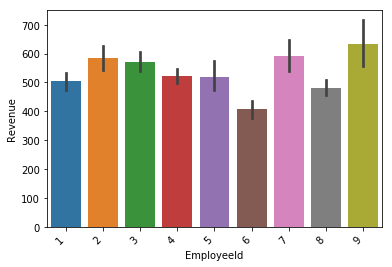

In [283]:
ax = sns.barplot(data = df_tukey, x = 'group',y = 'data', ci = 68)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,ha = 'right')
ax.set(ylabel='Revenue', xlabel = 'EmployeeId')

## Conclusion

With a p-value of 0.01 derived from the ANOVA test, the null hypothesis, an employees sales are the same regardless of salesperson can be rejected.

# Hypothesis 4

> Does a shipment's region determine its freight cost?

- $H_0$: The freight costs of shipments are equal across ship regions.
- $H_A$: The freight costs of shipments are not equal across ship regions .

In [284]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT * FROM 'Order';""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [285]:
cur.execute("""SELECT * FROM OrderDetail""")
df_orderdetail = pd.DataFrame(cur.fetchall())
df_orderdetail.columns = [x[0] for x in cur.description]
df_orderdetail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [286]:
cur.execute("""SELECT * FROM 'Order'""")
df_order = pd.DataFrame(cur.fetchall())
df_order.columns = [x[0] for x in cur.description]
df_order.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [287]:
df_order = df_order.merge(df_orderdetail,left_on='Id',right_on='OrderId')[['OrderId','UnitPrice','EmployeeId','Quantity']]
df_order

,OrderId,UnitPrice,EmployeeId,Quantity
0,10248,14.00,5,12
1,10248,9.80,5,10
2,10248,34.80,5,5
3,10249,18.60,6,9
4,10249,42.40,6,40
5,10250,7.70,4,10
6,10250,42.40,4,35
7,10250,16.80,4,15
8,10251,16.80,3,6
9,10251,15.60,3,15


In [288]:
#breaking up the groups based on region
df['Groups'] = df['ShipRegion'].str.contains('Europe'or'America')
df['Groups'].astype(int) # used Boolean to prevent error with later tests that require two numbered columns
df['Groups'].head()

0     True
1     True
2    False
3     True
4     True
Name: Groups, dtype: bool

In [289]:
df['Freight'].describe()

count     830.000000
mean       78.244205
std       116.779294
min         0.020000
25%        13.380000
50%        41.360000
75%        91.430000
max      1007.640000
Name: Freight, dtype: float64

## Test for Outliers

In [290]:
## To better organize data based on whether an item was full-priced or not, we can create dictionaries
groups = {}
for grp_name in df['ShipRegion'].unique():
    groups[grp_name] = df.groupby('ShipRegion').get_group(grp_name)['Freight']

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



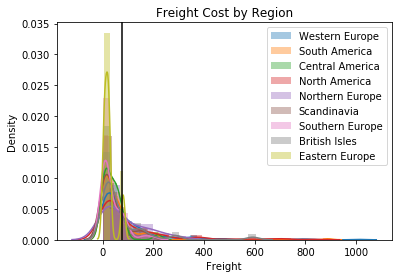

In [291]:
for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Freight Cost by Region',ylabel='Density')
plt.axvline(x=78.2,color ='black')

In [292]:
for k,v in groups.items():
    idx_out = find_outliers_Z(v)
    
    print(f'There are {idx_out} outliers present in {grp_name} using Z-Score')
    groups[k] = v[~idx_out]

There are 0      False
1      False
3      False
4      False
6      False
7      False
10     False
12     False
15     False
17     False
19     False
25     False
26     False
29     False
31     False
36     False
37     False
38     False
47     False
49     False
53     False
54     False
63     False
64     False
65     False
75     False
77     False
83     False
86     False
89     False
       ...  
730    False
731    False
742    False
743    False
748    False
751    False
756    False
760    False
763    False
764    False
769     True
772    False
773    False
780    False
781    False
785    False
787    False
788    False
790    False
793    False
795    False
798    False
803    False
805    False
810    False
819    False
822    False
824    False
827    False
828    False
Length: 276, dtype: bool outliers present in Eastern Europe using Z-Score
There are 2      False
5      False
8      False
9      False
13     False
20     False
35     False
39     False
42     Fa

## Test for Normalcy

In [293]:
#Normalcy test with scipy library
v = df['Freight']
stat,p = stats.normaltest(v)
print(f' Group {k} Normaltest p-value = {round(p,4)}')
sig = 'is Not' if p<0.5 else 'is'
print(f' -The data {sig} normal')

 Group Eastern Europe Normaltest p-value = 0.0
 -The data is Not normal


## Test for Equal Variance

In [294]:
data = []
for k, v in groups.items():
    data.append(v)

stat,p = stats.levene(*data)

print (f'Levene Test for Equal Variance p-value = {round(p,4)}')
sig = 'is Not' if p<0.5 else 'is'
print(f' -The data {sig} equally varied')

Levene Test for Equal Variance p-value = 0.0
 -The data is Not equally varied


## ANOVA Testing

In [295]:
stat,p = stats.f_oneway(*data)
print(f" ANOVA p-value is {round(p,8)}")

 ANOVA p-value is 8.7e-07


## Effect Size / Tukey

In [296]:
#Cohen_d(*data)
#do Cohen's for individual groupings not the whole thing

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0, 'Western Europe'),
 Text(0, 0, 'South America'),
 Text(0, 0, 'Central America'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Northern Europe'),
 Text(0, 0, 'Scandinavia'),
 Text(0, 0, 'Southern Europe'),
 Text(0, 0, 'British Isles'),
 Text(0, 0, 'Eastern Europe')]

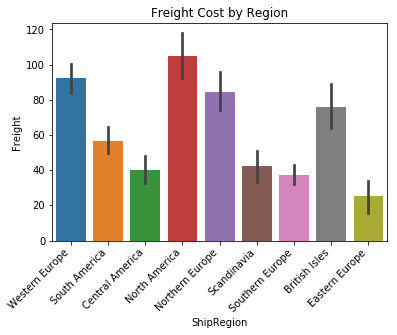

In [297]:
sns.barplot(data= df,x='ShipRegion', y='Freight',ci=68)
ax = plt.gca()
#ax.legend()
ax.set(title = 'Freight Cost by Region',ylabel='Freight')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,ha = 'right')


In [298]:
def prep_data_for_tukeys(data):
    """Accepts a dictionary with group names as the keys 
    and pandas series as the values. 
    
    Returns a dataframe ready for tukeys test:
    - with a 'data' column and a 'group' column for sms.stats.multicomp.pairwise_tukeyhsd 
    
    Example Use:
    df_tukey = prep_data_for_tukeys(grp_data)
    tukey = sms.stats.multicomp.pairwise_tukeyhsd(df_tukey['data'], df_tukey['group'])
    tukey.summary()
    """
    import pandas as pd
    df_tukey = pd.DataFrame(columns=['data','group'])

    for k,v in  data.items():
        grp_df = v.rename('data').to_frame()
        
        
        grp_df['group'] = k
        df_tukey=pd.concat([df_tukey,grp_df],axis=0)
        
    df_tukey['data'] = df_tukey['data'].astype(float)
    df_tukey['group'] = df_tukey['group'].astype(str)
    return df_tukey

In [299]:
df_tukey = prep_data_for_tukeys(groups) 
df_tukey.head()

,data,group
0,32.38,Western Europe
1,11.61,Western Europe
3,41.34,Western Europe
4,51.30,Western Europe
6,22.98,Western Europe


In [300]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = pairwise_tukeyhsd(df_tukey['data'],df_tukey['group'])
Hyp4_results = pd.DataFrame(data=model._results_table.data[1:], columns=model._results_table.data[0])
display(Hyp4_results)

,group1,group2,meandiff,lower,upper,reject
0,British Isles,Central America,-28.4823,-84.6475,27.6829,False
1,British Isles,Eastern Europe,-36.8814,-135.5423,61.7795,False
2,British Isles,North America,22.6807,-13.0220,58.3834,False
3,British Isles,Northern Europe,22.2636,-22.2582,66.7854,False
4,British Isles,Scandinavia,-19.6161,-75.0442,35.8121,False
5,British Isles,South America,-11.1318,-46.9577,24.6942,False
6,British Isles,Southern Europe,-29.8533,-72.9178,13.2113,False
7,British Isles,Western Europe,18.1310,-14.7499,51.0119,False
8,Central America,Eastern Europe,-8.3991,-114.1585,97.3603,False
9,Central America,North America,51.1630,-1.0459,103.3719,False


In [301]:
Hyp4_results.loc[Hyp4_results['reject'] == True]

,group1,group2,meandiff,lower,upper,reject
23,North America,South America,-33.8125,-63.0484,-4.5765,True
24,North America,Southern Europe,-52.5340,-90.2937,-14.7742,True
28,Northern Europe,Southern Europe,-52.1169,-98.3045,-5.9292,True
34,South America,Western Europe,29.2628,3.5488,54.9767,True
35,Southern Europe,Western Europe,47.9842,12.8806,83.0879,True


C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Freight Cost'), Text(0.5, 0, 'Region')]

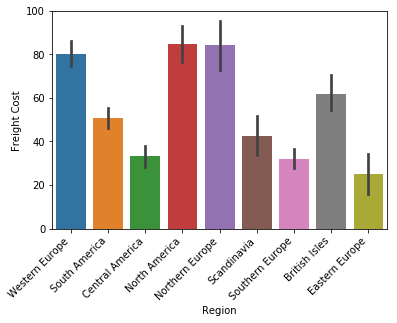

In [302]:
ax = sns.barplot(data = df_tukey, x = 'group',y = 'data', ci = 68)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,ha = 'right')
ax.set(ylabel='Freight Cost', xlabel = 'Region')

## Conclusion

With a p-value < 0.01 derived from the above test, the null hypothesis that an item's freight cost will remainthe same regardless of shipping region is false